<a href="https://colab.research.google.com/github/kathuman/Python-Experiments/blob/main/220309_SPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://www.kaggle.com/nalkrolu/statistical-process-control-quality-control/notebook
!pip install GaugeRnR

In [2]:
import numpy as np
import GaugeRnR
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import pandas as pd
plt.style.use('seaborn-colorblind')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
def Pareto(problems, values):
    df = pd.DataFrame({'Values': values})
    df.index = problems
    df = df.sort_values(by='Values',ascending=False)
    df["cumpercentage"] = df["Values"].cumsum()/df["Values"].sum()*100
    
    plt.figure(figsize=(14,6))
    plt.bar(df.index, df["Values"], color="C0")
    plt.xticks(rotation=70)
    ax = plt.twinx()
    ax.plot(df.index, df["cumpercentage"], color="r", marker="D")
    ax.yaxis.set_major_formatter(PercentFormatter())
    plt.title("Pareto Diagram")
    plt.tick_params(axis="y", colors="k")
    plt.tick_params(axis="y", colors="r")
    plt.grid()
    plt.show()

In [4]:
class XR_ControlChart:
    
    def fit(self,data):
        
        self.sample_size = len(data[0])
        self.number_of_sample = len(data)
        self.X = np.zeros((self.number_of_sample,1))
        self.R = np.zeros((self.number_of_sample,1))

        for i in range(self.number_of_sample):
            self.X[i] = data[i].mean()
            self.R[i] = data[i].max() - data[i].min()
        
        self.data = data
        
    def ControlChart(self,A2,D3,D4):

        ucl_X   = self.X.mean() + A2*self.R.mean()
        cl_X    = self.X.mean() 
        lcl_X   = self.X.mean() - A2*self.R.mean()

        ucl_R   = D4*self.R.mean()
        cl_R    = self.R.mean() 
        lcl_R   = D3*self.R.mean()
        
        plt.figure(figsize=(15,5))
        plt.title("Boxplot for {} Observations\nSample Size {}".format(len(self.data),len(self.data[0])))
        plt.boxplot(self.data.T)
        plt.show()

        plt.figure(figsize=(15,5))
        plt.plot(self.X,marker="o",color="k",label="X")
        plt.plot([ucl_X]*len(self.X),color="r",label="UCL={}".format(ucl_X.round(2)))
        plt.plot([cl_X]*len(self.X),color="b",label="CL={}".format(cl_X.round(2)))
        plt.plot([lcl_X]*len(self.X),color="r",label="LCL={}".format(lcl_X.round(2)))
        plt.title("X Chart")
        plt.xticks(np.arange(len(self.data)))
        plt.legend()
        plt.show()

        plt.figure(figsize=(15,5))
        plt.plot(self.R,marker="o",color="k",label="R")
        plt.plot([ucl_R]*len(self.X),color="r",label="UCL={}".format(ucl_R.round(2)))
        plt.plot([cl_R]*len(self.X),color="b",label="CL={}".format(cl_R.round(2)))
        plt.plot([lcl_R]*len(self.X),color="r",label="LCL={}".format(lcl_R.round(2)))
        plt.title("R Chart")
        plt.xticks(np.arange(len(self.data)))
        plt.legend()
        plt.show()
        
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        plt.boxplot(x=self.X)
        plt.title("Boxplot X")
        plt.xlabel("X")
        plt.subplot(1,2,2)
        plt.boxplot(x=self.R)
        plt.title("Boxplot R")
        plt.xlabel("R")
        plt.show()

In [5]:
class XS_ControlChart:
    
    def fit(self,data):
        
        self.sample_size = len(data[0])
        self.number_of_sample = len(data)
        self.X = np.zeros((self.number_of_sample,1))
        self.S = np.zeros((self.number_of_sample,1))

        for i in range(self.number_of_sample):
            self.X[i] = data[i].mean()
            self.S[i] = data[i].std()
        
        self.data = data
        
    def ControlChart(self,A3,B3,B4):

        ucl_X   = self.X.mean() + A3*self.S.mean()
        cl_X    = self.X.mean() 
        lcl_X   = self.X.mean() - A3*self.S.mean()

        ucl_S   = B4*self.S.mean()
        cl_S    = self.S.mean() 
        lcl_S   = B3*self.S.mean()
        
        plt.figure(figsize=(15,5))
        plt.title("Boxplot for {} Observations\nSample Size {}".format(len(self.data),len(self.data[0])))
        plt.boxplot(self.data.T)
        plt.show()

        plt.figure(figsize=(15,5))
        plt.plot(self.X,marker="o",color="k",label="X")
        plt.plot([ucl_X]*len(self.X),color="r",label="UCL={}".format(ucl_X.round(2)))
        plt.plot([cl_X]*len(self.X),color="b",label="CL={}".format(cl_X.round(2)))
        plt.plot([lcl_X]*len(self.X),color="r",label="LCL={}".format(lcl_X.round(2)))
        plt.title("X Chart")
        plt.xticks(np.arange(len(self.data)))
        plt.legend()
        plt.show()

        plt.figure(figsize=(15,5))
        plt.plot(self.S,marker="o",color="k",label="S")
        plt.plot([ucl_S]*len(self.X),color="r",label="UCL={}".format(ucl_S.round(2)))
        plt.plot([cl_S]*len(self.X),color="b",label="CL={}".format(cl_S.round(2)))
        plt.plot([lcl_S]*len(self.X),color="r",label="LCL={}".format(lcl_S.round(2)))
        plt.title("S Chart")
        plt.xticks(np.arange(len(self.data)))
        plt.legend()
        plt.show()
        
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        plt.boxplot(x=self.X)
        plt.title("Boxplot X")
        plt.xlabel("X")
        plt.subplot(1,2,2)
        plt.boxplot(x=self.S)
        plt.title("Boxplot S")
        plt.xlabel("S")
        plt.show()

In [6]:
class MR_ControlChart:
    
    def fit(self,data):
        
        self.X = data
        self.number_of_sample = len(self.X)
        self.mR = np.zeros(((self.number_of_sample-1),1))

        for i in range(len(self.mR)):
            self.mR[i] = abs(self.X[i+1] - self.X[i])
    
    def ControlChart(self,d2,D4,D3):
        
        ucl_X   = self.X.mean() + (3/d2*np.sqrt(self.number_of_sample))*self.mR.mean()
        cl_X    = self.X.mean() 
        lcl_X   = self.X.mean() - (3/d2*np.sqrt(self.number_of_sample))*self.mR.mean()

        ucl_mR   = D4*self.mR.mean()
        cl_mR    = self.mR.mean() 
        lcl_mR   = D3*self.mR.mean()
        

        plt.figure(figsize=(15,5))
        plt.plot(self.X,marker="o",color="k",label="X")
        plt.plot([ucl_X]*len(self.X),color="r",label="UCL={}".format(ucl_X.round(2)))
        plt.plot([cl_X]*len(self.X),color="b",label="CL={}".format(cl_X.round(2)))
        plt.plot([lcl_X]*len(self.X),color="r",label="LCL={}".format(lcl_X.round(2)))
        plt.title("X Chart")
        plt.xticks(np.arange(len(self.X)))
        plt.legend()
        plt.show()

        plt.figure(figsize=(15,5))
        plt.plot(self.mR ,marker="o",color="k",label="mR ")
        plt.plot([ucl_mR ]*len(self.X),color="r",label="UCL={}".format(ucl_mR.round(2)))
        plt.plot([cl_mR ]*len(self.X),color="b",label="CL={}".format(cl_mR.round(2)))
        plt.plot([lcl_mR ]*len(self.X),color="r",label="LCL={}".format(lcl_mR.round(2)))
        plt.title("mR  Chart")
        plt.xticks(np.arange(len(self.X)))
        plt.legend()
        plt.show()
        
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        plt.boxplot(x=self.X)
        plt.title("Boxplot X")
        plt.xlabel("X")
        plt.subplot(1,2,2)
        plt.boxplot(x=self.mR )
        plt.title("Boxplot mR")
        plt.xlabel("mR ")
        plt.show()

In [7]:
class p_ControlChart:
    def fit(self,D,n):
        self.D = D
        self.n = n 
        self.p = np.zeros(len(self.D)) 
        for i in range(len(D)):
            self.p[i] = D[i] / n
    
    def ControlChart(self):
        m      = len(self.p)
        p_mean = self.p.sum() / m
        
        ucl = p_mean + 3*np.sqrt((p_mean*(1-p_mean))/(self.n))
        cl  = p_mean
        lcl = p_mean - 3*np.sqrt((p_mean*(1-p_mean))/(self.n)) 
        
        plt.figure(figsize=(15,5))
        plt.plot(self.p,marker="o",color="k",label="$p_i$")
        plt.plot([ucl]*(len(self.D)),label="UCL",color="r")
        plt.plot([cl]*(len(self.D)),label="CL",color="k",alpha=0.4)
        plt.plot([lcl]*(len(self.D)),label="LCL",color="r")
        plt.legend(loc="best")
        plt.xticks(np.arange(len(self.D)))
        plt.title("p Control Chart")
        plt.show()
        
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        plt.boxplot(self.D,vert=False)
        plt.title("Boxplot of Data")
        plt.ylabel("Data")
        plt.subplot(1,2,2)
        plt.hist(self.D,bins=int(len(self.D)/3),density=True,color="blue")
        plt.ylabel("Frequency")
        plt.title("Histogram of Data")
        plt.show()

In [8]:
class u_ControlChart:
    
    def fit(self,c,n):
        
        self.c      = c
        self.n      = n
        self.u_mean = sum(self.c) / sum(self.n)
        self.value  = np.array(c) /  np.array(n)
        
    def ControlChart(self):
        
        ucl = self.u_mean + 3 * np.sqrt(self.u_mean/np.mean(self.n))
        cl  = self.u_mean
        lcl = self.u_mean - 3 * np.sqrt(self.u_mean/np.mean(self.n))     
        
        plt.figure(figsize=(15,5))
        plt.plot(self.value,marker="o",color="k",label="$C_i$")
        plt.plot([ucl]*len(self.n),color="r",label="UCL{}".format(ucl.round(2)))
        plt.plot([cl]*len(self.n),color="k",alpha=0.4,label="CL{}".format(cl.round(2)))
        plt.plot([lcl]*len(self.n),color="r",label="LCL{}".format(lcl.round(2)))
        plt.xticks(np.arange(len(self.c)))
        plt.legend(loc="best")
        plt.title("u - Control Chart")
        plt.show()
        
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        plt.boxplot(self.c,vert=False)
        plt.title("Boxplot of Data")
        plt.ylabel("Data")
        plt.subplot(1,2,2)
        plt.hist(self.c,bins=int(len(self.c)/3),density=True,color="blue")
        plt.ylabel("Frequency")
        plt.title("Histogram of Data")
        plt.show()   

In [9]:
class EWMA:
    def fit(self,data,lamda,mean):
        
        self.X     = data
        self.z     = np.zeros(len(data))
        self.lamda = lamda
        self.mean  = mean
        self.z[0]  = self.mean
        for i in range(1,len(self.z)):
            self.z[i] = self.lamda*self.X[i] + (1-self.lamda)*self.z[i-1] 
 
    def  ControlChart(self,L,sigma):
        # L     : Kontrol limitlerinin genişliği
        ucl = np.zeros(len(self.X))
        lcl = np.zeros(len(self.X))
        I   = np.arange(1,len(self.X)+1)
        
        for i in range(len(self.X)):
            ucl[i] = self.mean + L*sigma*np.sqrt((self.lamda / (2 - self.lamda))*(1-(1-self.lamda)**(I[i])))
            lcl[i] = self.mean - L*sigma*np.sqrt((self.lamda / (2 - self.lamda))*(1-(1-self.lamda)**(I[i])))
        
        plt.figure(figsize=(15,5))
        plt.plot(self.z,marker="o",color="k",label="$Z_i$")
        plt.plot([self.mean]*len(self.X),color="k",alpha=0.35)
        plt.plot(ucl,color="r",label="UCL {}".format(ucl[len(ucl)-1].round(2)))
        plt.plot(lcl,color="r",label="LCL {}".format(lcl[len(lcl)-1].round(2)))
        plt.title("EWMA Conrol Chart")
        plt.legend(loc="upper left")
        plt.show()
        
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        plt.boxplot(self.X,vert=False)
        plt.title("Boxplot of Data")
        plt.ylabel("Data")
        plt.subplot(1,2,2)
        plt.hist(self.X,bins=int(len(self.X)/3),density=True,color="blue")
        plt.ylabel("Frequency")
        plt.title("Histogram of Data")
        plt.show()

Observations (Datas)

In [10]:
problems=['Ağ Hatası', 'Pul Hatası', 'Yanlış Ürün', 'Kulağı Kesik', 'Yağ Lekesi',
          'Kumaş Lekesi', 'Lastik Lekesi', 'Kenar Hatası','Baskı Hatası','Yamuk','Düğme Tamiri','Son Kapama']
values=[5,21,9,20,16,123,99,5,74,8,94,10]

c = np.array([2,3,8,1,1,4,1,4,5,1,8,2,4,3,4,1,8,3,7,4])
n = np.array([50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
       50, 50, 50])

data = np.array([[57, 46, 62, 23, 19],
       [52, 49, 42, 60, 32],
       [64, 53, 33, 20, 32],
       [46, 61, 55, 24, 44],
       [26, 47, 21, 62, 48],
       [36, 64, 63, 42, 38],
       [22, 52, 44, 49, 43],
       [56, 38, 56, 44, 46],
       [52, 33, 40, 30, 65],
       [57, 55, 30, 35, 46],
       [53, 24, 63, 49, 43],
       [24, 33, 38, 67, 24],
       [65, 36, 32, 48, 35],
       [38, 61, 48, 43, 38],
       [68, 42, 21, 29, 43],
       [60, 48, 44, 19, 60],
       [43, 28, 32, 65, 22],
       [57, 47, 69, 56, 24],
       [31, 29, 48, 63, 42],
       [39, 68, 20, 51, 26]])

data2 = np.array([296, 289, 309, 302, 308, 291, 298, 288, 305, 303, 296, 294, 297,
       308, 294, 308, 292, 300, 299, 291])

data3 = np.array([ 9.86309233,  9.84000103, 10.97886276,  9.50805567,  9.79770921,
       10.3763538 , 10.77708283, 10.91984387, 10.58749389, 10.55658341,
       10.56227153,  9.23660779, 10.66084511, 10.12406454,  9.22176616,
       10.23525939,  9.63873061, 10.63521265,  9.34684212,  9.74626569,
        9.55167571,  9.203874  ,  9.11321254,  9.28478856, 10.21514137,
       10.93835811,  9.00417726, 10.20495895, 10.12245382,  9.46752498])

data5 = np.array(           
    [[[37, 38, 37],   
      [42, 42, 43],   
      [30, 31, 31],  
      [42, 43, 42],    
      [28, 30, 29],
      [42, 42, 43],   
      [25, 26, 27],  
      [40, 40, 40],    
      [25, 25, 25],
      [35, 34, 34]],   
     [[41, 41, 40],   
      [42, 42, 42],   
      [31, 31, 31],   
      [43, 43, 43],    
      [29, 30, 29],
      [45, 45, 45],
      [28, 28, 30],   
      [43, 42, 42],   
      [27, 29, 28],   
      [35, 35, 34]],   
     [[41, 42, 41],   
      [43, 42, 43],   
      [29, 30, 28],   
      [42, 42, 42],    
      [31, 29, 29],
      [44, 46, 45],
      [29, 27, 27],   
      [43, 43, 41],   
      [26, 26, 26],   
      [35, 34, 35]]])

#       m1    m2    m3
data4 = np.array(            #
    [[[3.29, 3.41, 3.64],   # p1 | o1
      [2.44, 2.32, 2.42],   # p2
      [4.34, 4.17, 4.27],   # p3
      [3.47, 3.5, 3.64],    # p4
      [2.2, 2.08, 2.16]],   # p5
     [[3.08, 3.25, 3.07],   # p1 | o2
      [2.53, 1.78, 2.32],   # p2
      [4.19, 3.94, 4.34],   # p3
      [3.01, 4.03, 3.2],    # p4
      [2.44, 1.8, 1.72]],   # p5
     [[3.04, 2.89, 2.85],   # p1 | o3
      [1.62, 1.87, 2.04],   # p2
      [3.88, 4.09, 3.67],   # p3
      [3.14, 3.2, 3.11],    # p4
      [1.54, 1.93, 1.55]]]) # p5

data6 =  np.array([12,15,8,10,4,7,16,9,14,10,5,6,17,12,22,8,10,5,13,11,20,18,24,15,9,12,7,13,9,6])

Pareto Diagram

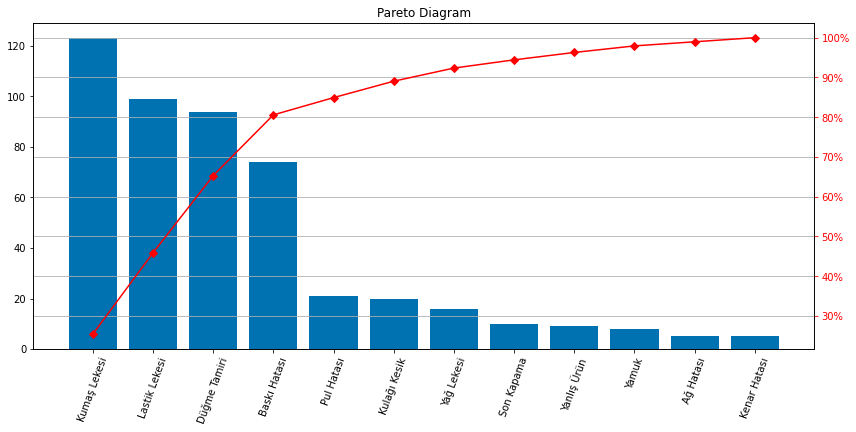

In [11]:
Pareto(problems,values)

Moving Average Control Chart

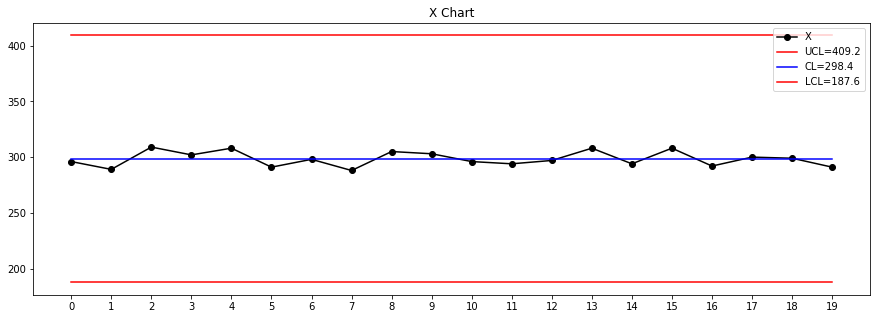

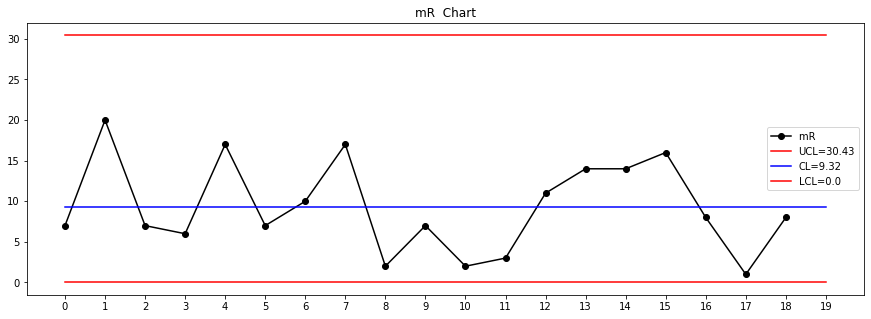

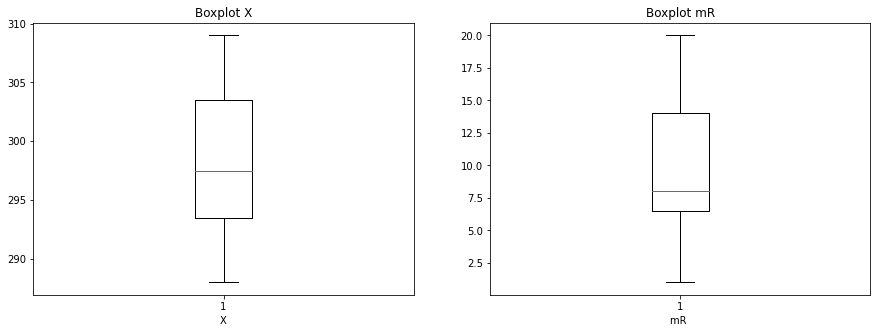

In [12]:
chart = MR_ControlChart()
chart.fit(data2)
chart.ControlChart(d2 = 1.128,D3 = 0 ,D4 = 3.267)

X-R Control Chart

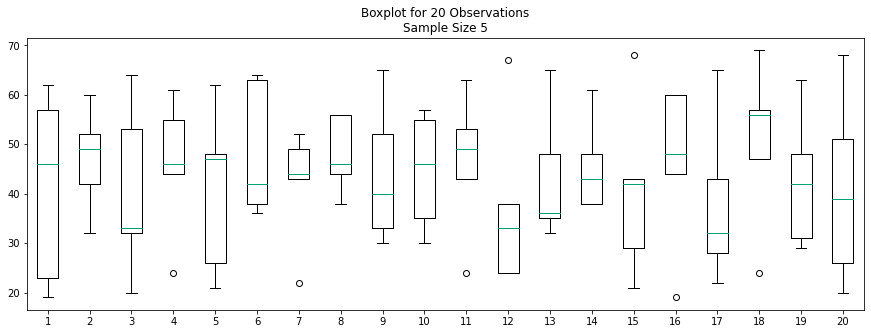

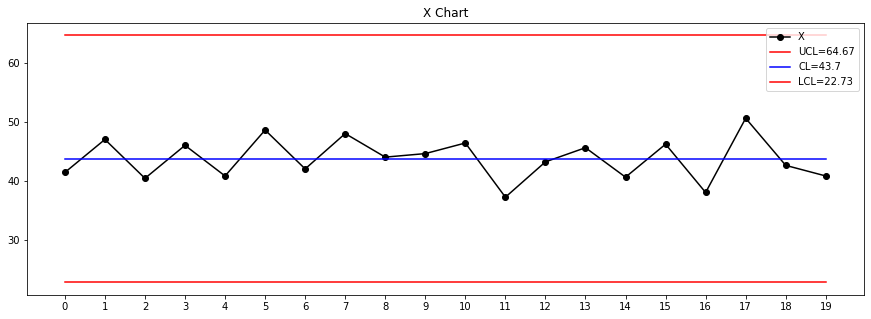

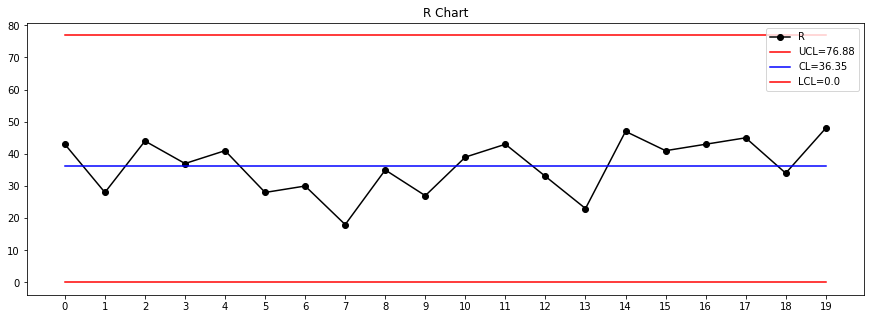

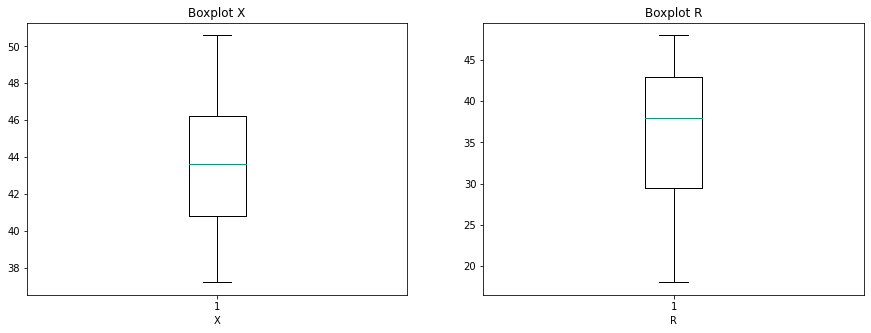

In [13]:
chart = XR_ControlChart()
chart.fit(data)
chart.ControlChart(A2 = 0.577,D3 = 0 ,D4 = 2.115)

X-S Control Chart

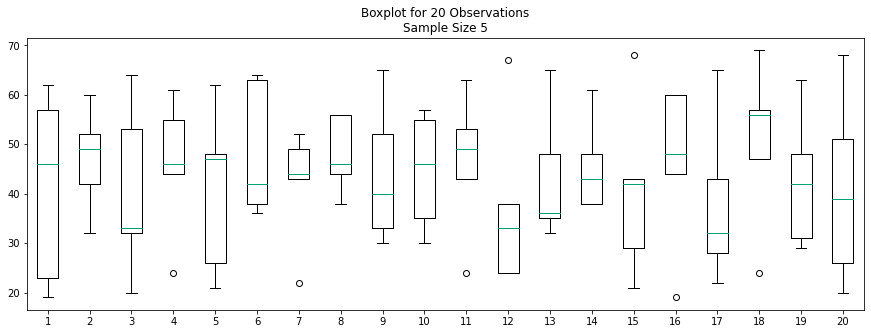

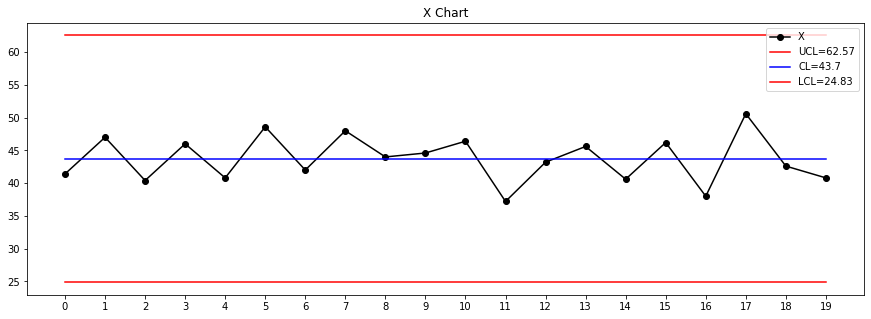

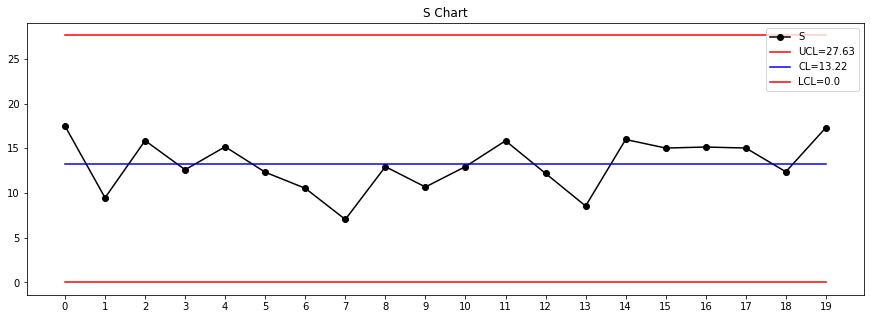

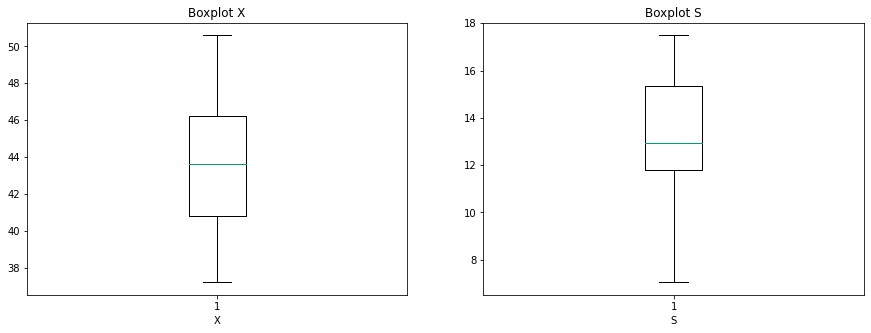

In [14]:
chart = XS_ControlChart()
chart.fit(data)
chart.ControlChart(A3 = 1.427 ,B3 = 0 ,B4 = 2.089)

p Control Chart

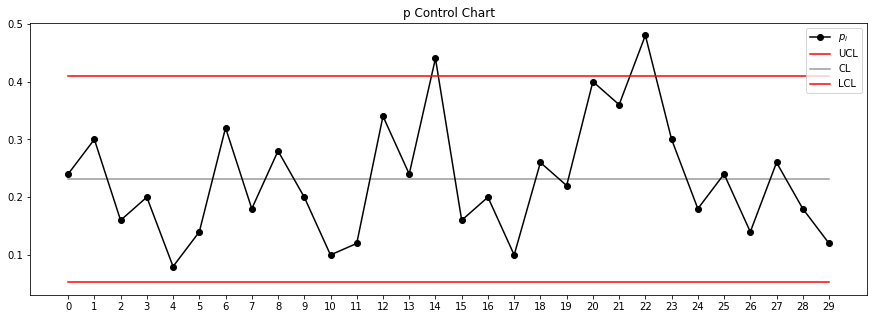

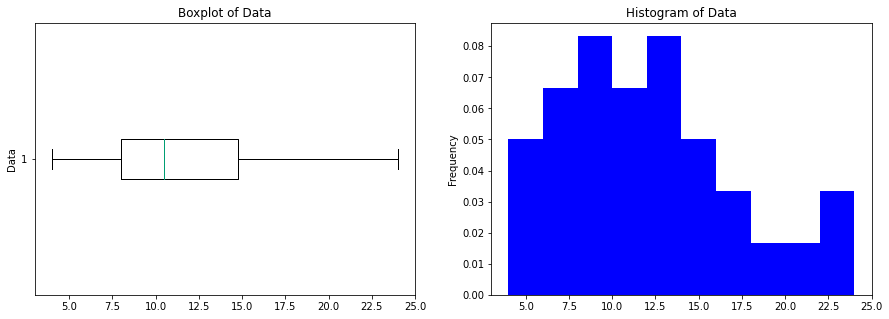

In [15]:
chart = p_ControlChart()
chart.fit(D=data6,n=50)
chart.ControlChart()

u Control Chart

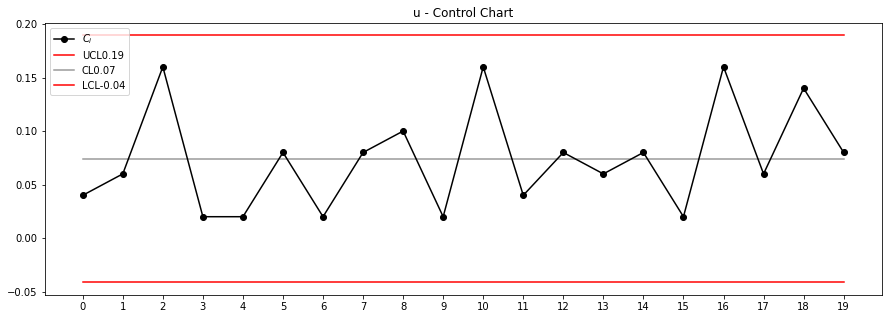

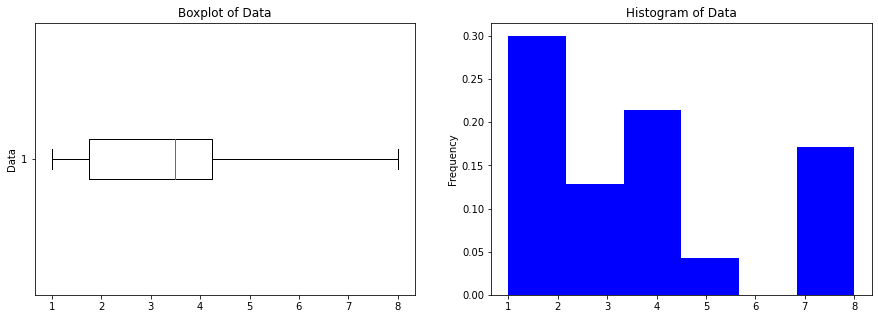

In [16]:
chart = u_ControlChart()
chart.fit(c,n)
chart.ControlChart()

EWMA Control Chart

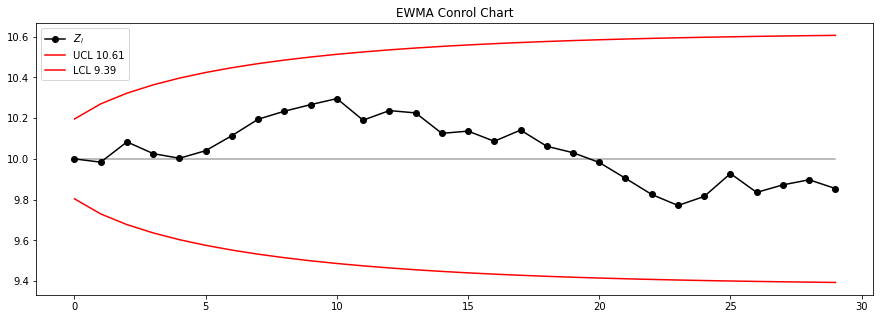

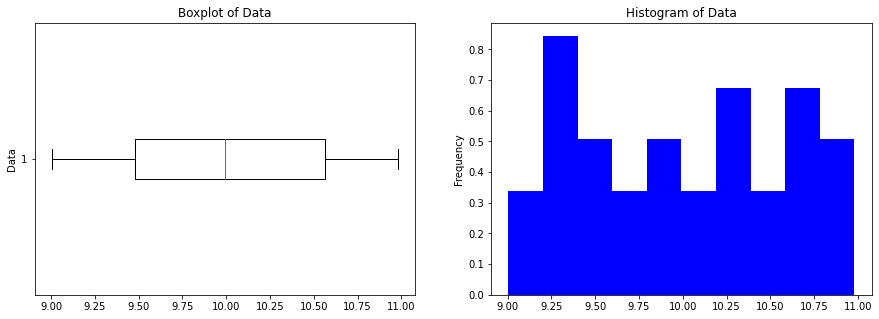

In [17]:
chart = EWMA()
chart.fit(data=data3,lamda=0.1,mean=10)
chart.ControlChart(L=2.7,sigma=1)

Gauge R&R

In [18]:
g = GaugeRnR.GaugeRnR(data4)
g.calculate()
print(g.summary())

╒═══════════════════════╤══════╤════════╤═══════╤═══════╤═══════╤═══════════╤═══════════╕
│ Sources of Variance   │   DF │     SS │    MS │   Var │   Std │ F-value   │ P-value   │
╞═══════════════════════╪══════╪════════╪═══════╪═══════╪═══════╪═══════════╪═══════════╡
│ Operator              │    2 │  1.63  │ 0.815 │ 0.054 │ 0.232 │ 100.322   │ 0.000     │
├───────────────────────┼──────┼────────┼───────┼───────┼───────┼───────────┼───────────┤
│ Part                  │    4 │ 28.909 │ 7.227 │ 0.802 │ 0.896 │ 889.458   │ 0.000     │
├───────────────────────┼──────┼────────┼───────┼───────┼───────┼───────────┼───────────┤
│ Operator by Part      │    8 │  0.065 │ 0.008 │ 0     │ 0     │ 0.142     │ 0.996     │
├───────────────────────┼──────┼────────┼───────┼───────┼───────┼───────────┼───────────┤
│ Measurment            │   30 │  1.712 │ 0.057 │ 0.057 │ 0.239 │           │           │
├───────────────────────┼──────┼────────┼───────┼───────┼───────┼───────────┼───────────┤
│ Total   

In [19]:
g.creatPartsBoxPlot()

In [20]:
g.creatOperatorsBoxPlot()